In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reads the Benin,Sierra Leone and Togo dataset from scripts directory in solarRadiationData.
# Returns: A pandas DataFrame containing the dataset.
import sys
sys.path.append('..')
from scripts.solarRadiationData import readData
data = pd.read_csv(readData('Benin'))

# Prints the first few rows of the DataFrame
data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [3]:
# Gets the dimensions (rows and columns) of the Benin-Malanville dataset.
data.shape

(525600, 19)

In [4]:
# Calculates the sum of null values in each column of the Benin-Malanville dataset.
# Returns: A pandas Series containing the count of null values for each column.
data.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [5]:
# Drops the 'Comments' column from the Benin-Malanville dataset, as all values in this column are null.
# Returns: A new DataFrame without the 'Comments' column.
data=data.drop('Comments',axis=1)
data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3


In [6]:
# Calculates summary statistics for the Benin-Malanville dataset, including count, mean, standard deviation, minimum, 25th percentile, 
# 50th percentile (median), 75th percentile, and maximum values.
# Returns: A pandas DataFrame containing the summary statistics for each numerical column.
data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000


In [7]:
# Checks for outliers and negative values in a specified column of a DataFrame using the IQR method.
# Args: data: A DataFrame 
#       column_name: The name of the column to check.

from scripts.solarRadiationData import CheckOutLiersAndNegativeValue
CheckOutLiersAndNegativeValue(data,"DNI")
CheckOutLiersAndNegativeValue(data,"GHI")
CheckOutLiersAndNegativeValue(data,"DHI")
CheckOutLiersAndNegativeValue(data,"ModA")
CheckOutLiersAndNegativeValue(data,"ModB")
CheckOutLiersAndNegativeValue(data,"WS")
CheckOutLiersAndNegativeValue(data,"WSgust")


Outliers in DNI: 15196 Negative value in  DNI: 275987
Outliers in GHI: 145 Negative value in  GHI: 258847
Outliers in DHI: 8733 Negative value in  DHI: 259182
Outliers in ModA: 98 Negative value in  ModA: 0
Outliers in ModB: 240 Negative value in  ModB: 0
Outliers in WS: 6717 Negative value in  WS: 0
Outliers in WSgust: 5368 Negative value in  WSgust: 0


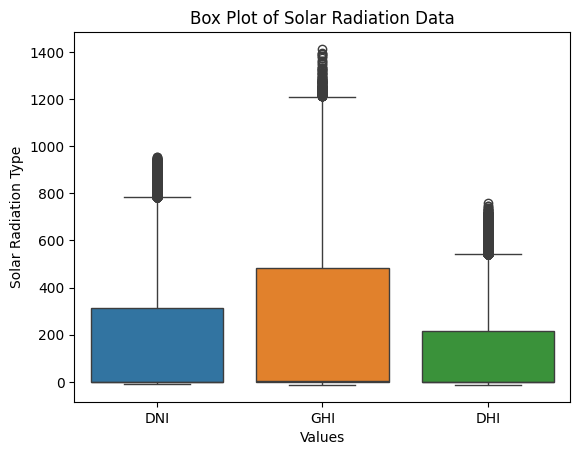

In [8]:
# Creates a box plot to visualize the distribution of solar radiation (DNI, GHI, DHI) 
# and identify potential outliers (before remove outliers).
# Displays the plot with a vertical orientation (columns on x-axis).
from scripts.solarRadiationData import boxPlotForIdentifyOutlier
boxPlotForIdentifyOutlier(data)

In [9]:
# Replaces negative values in a specified column of a DataFrame with zero.
#     Args:
#         data: A DataFrame.
#         column_name: The name of the column to modify.
#     Returns: The modified DataFrame with negative values replaced.
from scripts.solarRadiationData import replaceNegativeWithZero
data=replaceNegativeWithZero(data,['DNI','GHI','DHI'])
data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,241.958821,167.441866,116.993033,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
std,330.101787,261.547532,157.463619,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743
min,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,1.800000,0.000000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000


In [10]:
# Removes outliers from specified columns of a DataFrame using Winsorization.
# Args:
#     data: A pandas DataFrame.
#     column_names: A list of column names to process.
# Returns: The modified DataFrame with outliers replaced.
from scripts.solarRadiationData import removeOutliersWinsorization
data=removeOutliersWinsorization(data,['DNI','GHI','DHI','ModA','ModB','WS','WSgust'])
data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,241.945038,165.984882,116.139668,236.580515,228.862939,28.179683,54.487969,2.106140,2.792017,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
std,330.059508,257.868678,154.932775,326.868261,316.475487,5.924297,28.073069,1.549333,1.962891,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743
min,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,1.800000,0.000000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,1208.500000,785.500000,540.750000,1159.250000,1119.750000,43.800000,100.000000,6.250000,8.300000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000


In [11]:
# verify the dataSet have no negative and outliers 
# after replacing negative with zero and solve outliers with wisorization
CheckOutLiersAndNegativeValue(data,"DNI")
CheckOutLiersAndNegativeValue(data,"GHI")
CheckOutLiersAndNegativeValue(data,"DHI")
CheckOutLiersAndNegativeValue(data,"ModA")
CheckOutLiersAndNegativeValue(data,"ModB")
CheckOutLiersAndNegativeValue(data,"WS")
CheckOutLiersAndNegativeValue(data,"WSgust")

Outliers in DNI: 0 Negative value in  DNI: 0
Outliers in GHI: 0 Negative value in  GHI: 0
Outliers in DHI: 0 Negative value in  DHI: 0
Outliers in ModA: 0 Negative value in  ModA: 0
Outliers in ModB: 0 Negative value in  ModB: 0
Outliers in WS: 0 Negative value in  WS: 0
Outliers in WSgust: 0 Negative value in  WSgust: 0


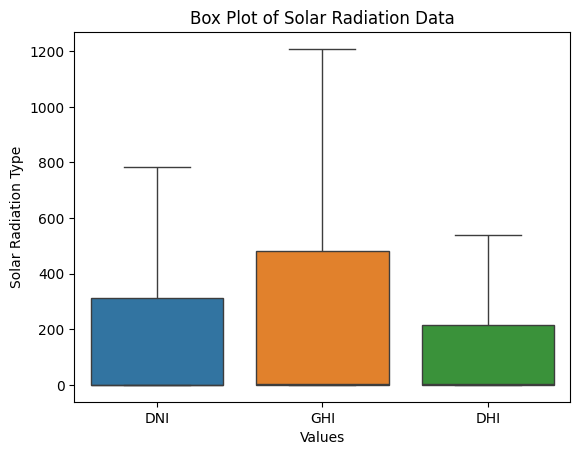

In [12]:

# Creates a box plot to visualize the distribution of solar radiation (DNI, GHI, DHI) 
# and identify solved outliers.
boxPlotForIdentifyOutlier(data)


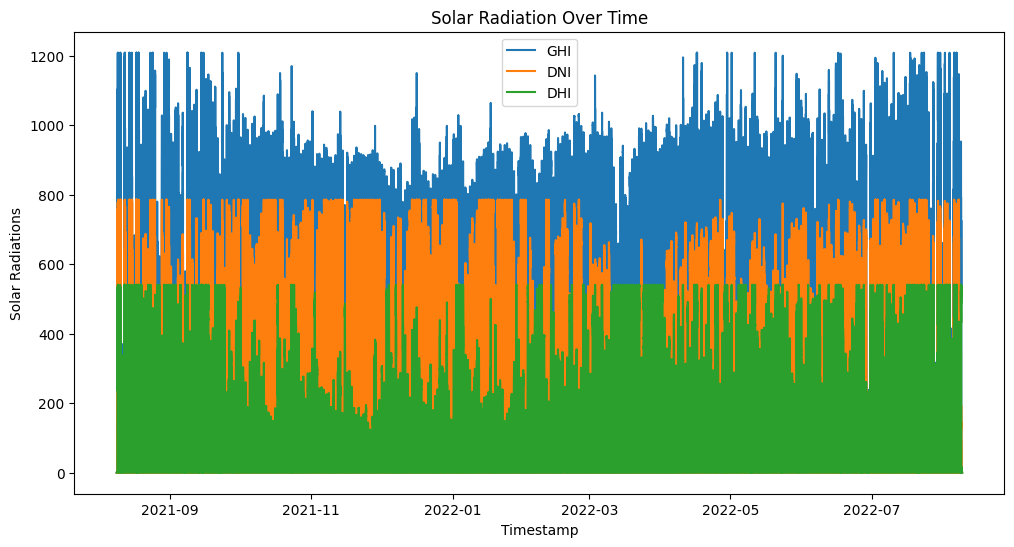

In [13]:
# Convert 'Timestamp' to datetime format
data['Timestamp']=pd.to_datetime(data['Timestamp'])

# Creates a line plot to visualize GHI, DNI, and DHI over time.
# Args: data: A DataFrame containing the solar radiation data.
from scripts.solarRadiationData import solarRadiationsOvertime
solarRadiationsOvertime(data)


In [14]:
cleaned_data = data[data['Cleaning'] == 1]
uncleaned_data = data[data['Cleaning'] == 0]

In [15]:
cleaned_data.describe()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,485,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.0,485.0,485.000000,485.000000
mean,2022-02-13 12:53:53.567010304,316.835052,252.703505,183.651856,307.229278,301.972165,26.218969,60.434227,2.529278,3.371546,0.545155,169.348660,10.451546,995.544330,1.0,0.0,40.333608,35.348660
min,2021-08-11 08:33:00,35.700000,0.000000,35.400000,37.100000,37.300000,16.300000,3.600000,0.000000,0.000000,0.000000,0.000000,0.000000,987.000000,1.0,0.0,19.500000,18.800000
25%,2021-11-07 10:40:00,211.900000,24.600000,133.200000,187.800000,186.100000,23.700000,33.500000,1.500000,2.100000,0.400000,80.400000,8.100000,994.000000,1.0,0.0,34.800000,29.800000
50%,2022-02-21 08:55:00,308.400000,232.300000,172.600000,291.700000,283.200000,26.300000,66.400000,2.500000,3.400000,0.500000,206.800000,10.900000,996.000000,1.0,0.0,40.300000,34.500000
75%,2022-05-17 08:32:00,393.000000,400.900000,222.700000,393.900000,375.200000,28.600000,84.000000,3.500000,4.400000,0.700000,242.200000,13.100000,997.000000,1.0,0.0,45.800000,39.800000
max,2022-08-08 07:59:00,869.000000,785.500000,540.750000,914.000000,917.000000,41.000000,100.000000,6.250000,8.300000,1.500000,359.700000,38.900000,1002.000000,1.0,0.0,70.100000,59.400000
std,NaN,149.849103,219.079906,73.766696,159.987048,153.643905,3.769743,26.446939,1.560905,1.922973,0.250129,90.973461,5.229855,2.181959,0.0,0.0,7.962438,7.003239


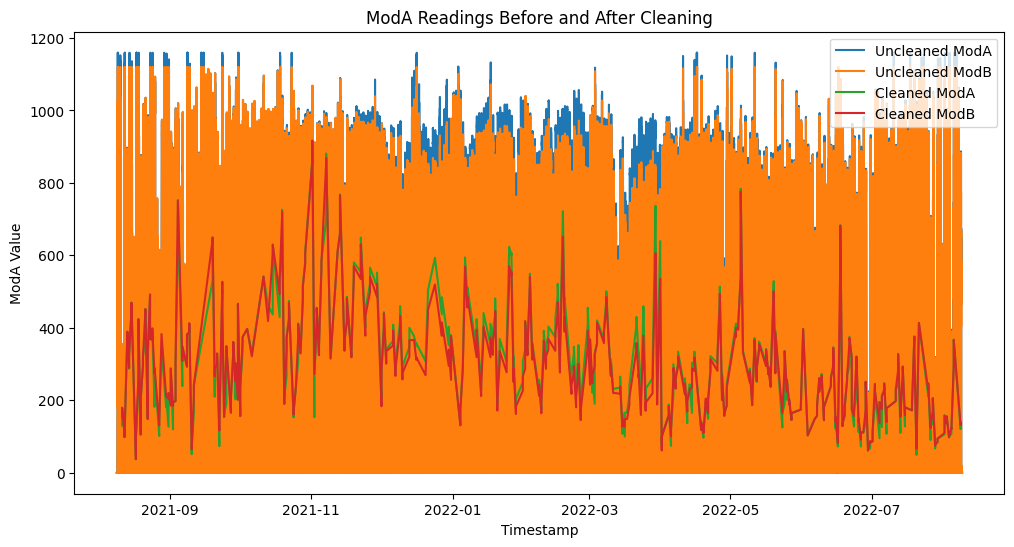

In [16]:

from scripts.solarRadiationData import evaluateImpactofCleaningOvertime
evaluateImpactofCleaningOvertime(cleaned_data,uncleaned_data)

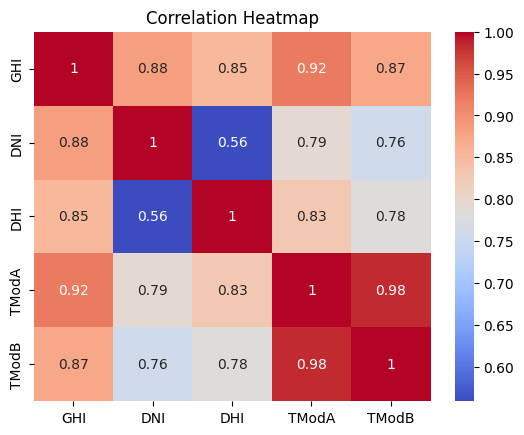

In [17]:

from scripts.solarRadiationData import correlationBetweenSolarRadiationandTemperature
correlationBetweenSolarRadiationandTemperature(data)


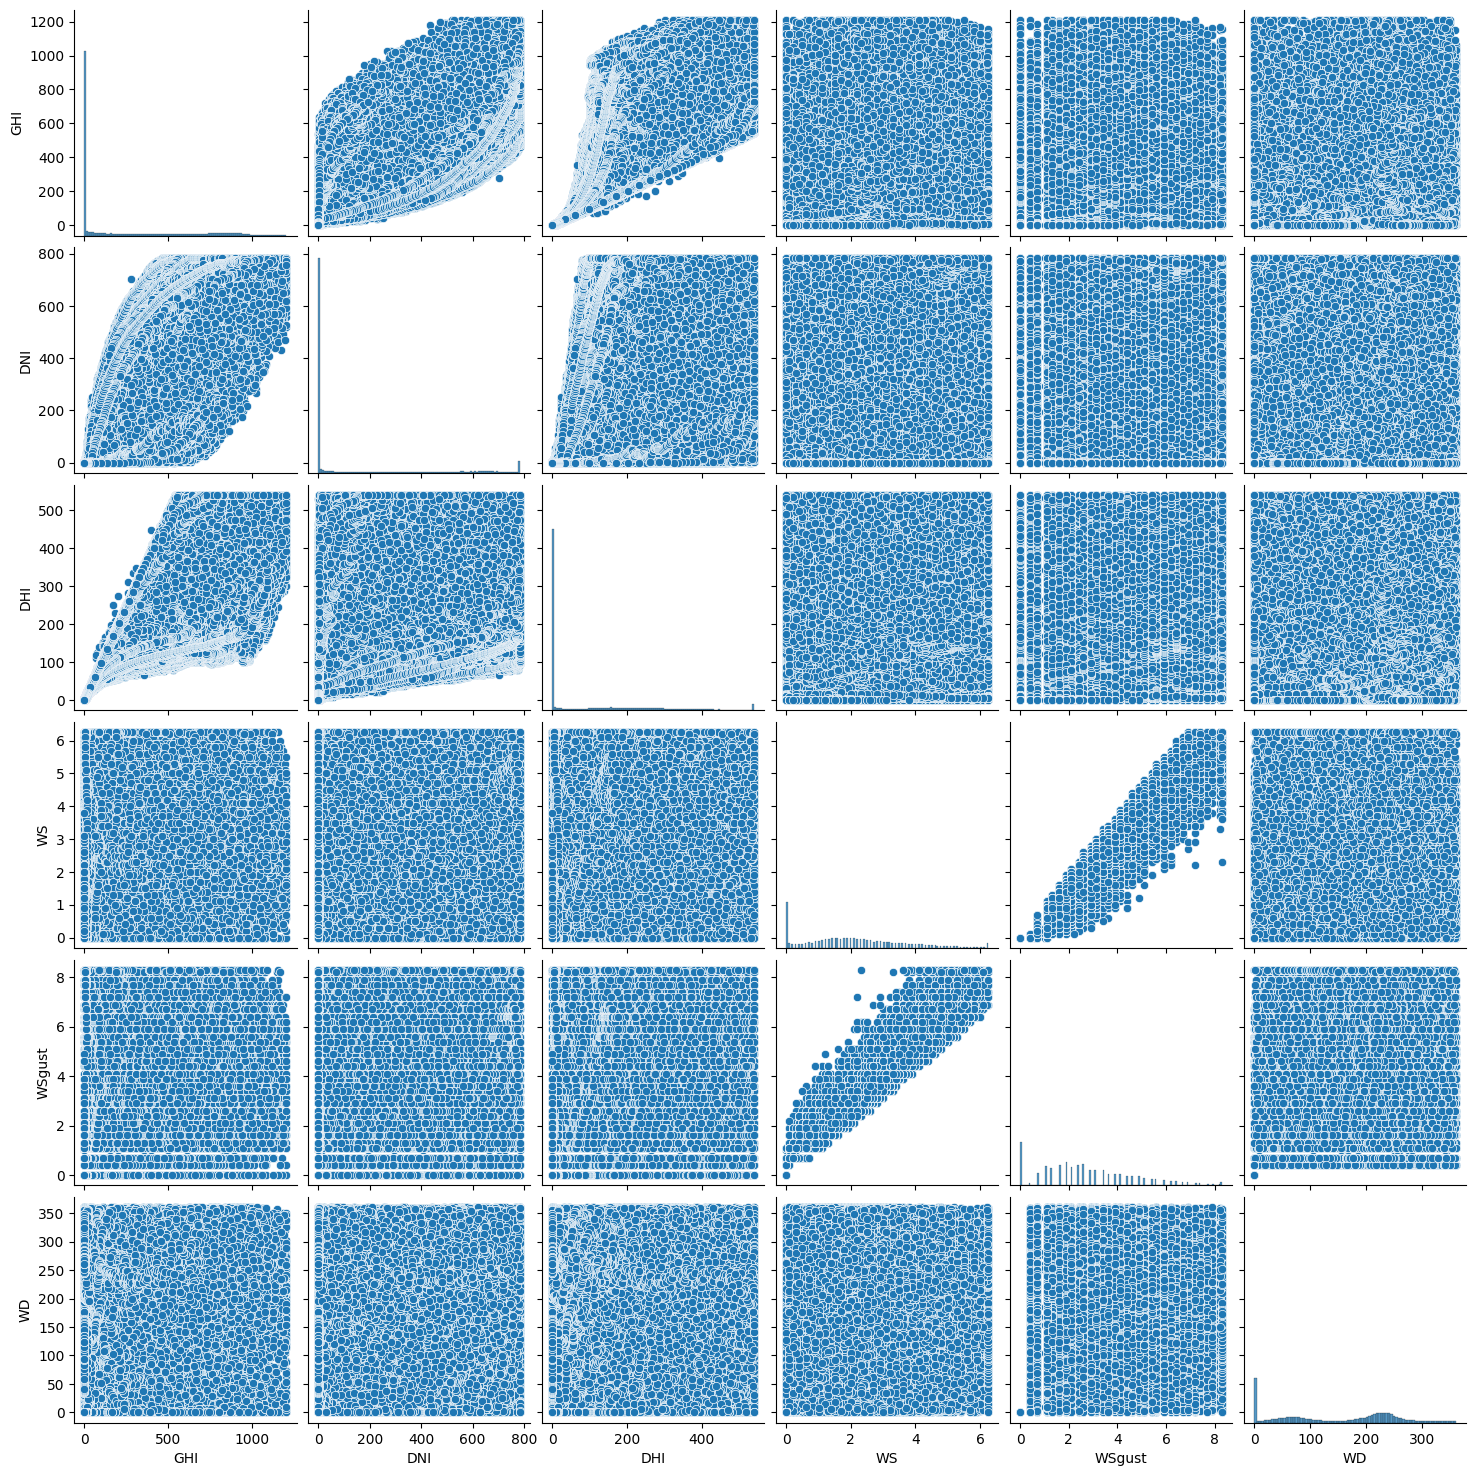

In [18]:

from scripts.solarRadiationData import correlationBetweenSolarRadiationandWind
correlationBetweenSolarRadiationandWind(data)

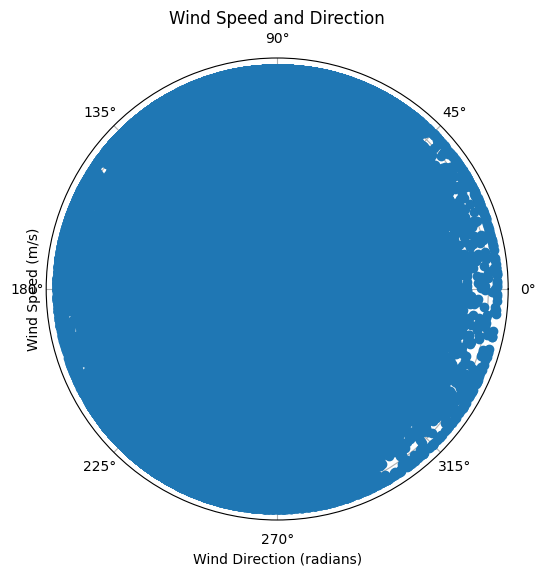

In [19]:

from scripts.solarRadiationData import windAnalysiswithWindspeedAndWindDirection
windAnalysiswithWindspeedAndWindDirection(data)

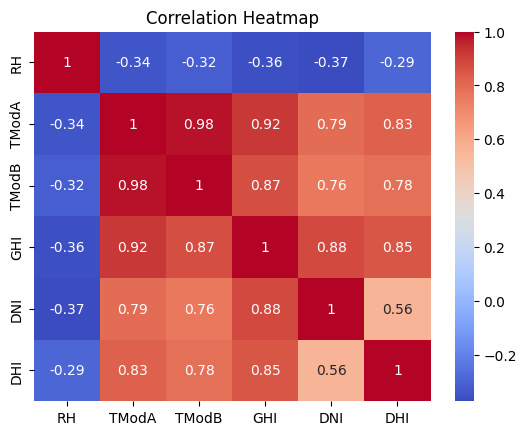

In [20]:

from scripts.solarRadiationData import examineRelativeHumidityInfluenceTempAndSolarRadiation
examineRelativeHumidityInfluenceTempAndSolarRadiation(data)

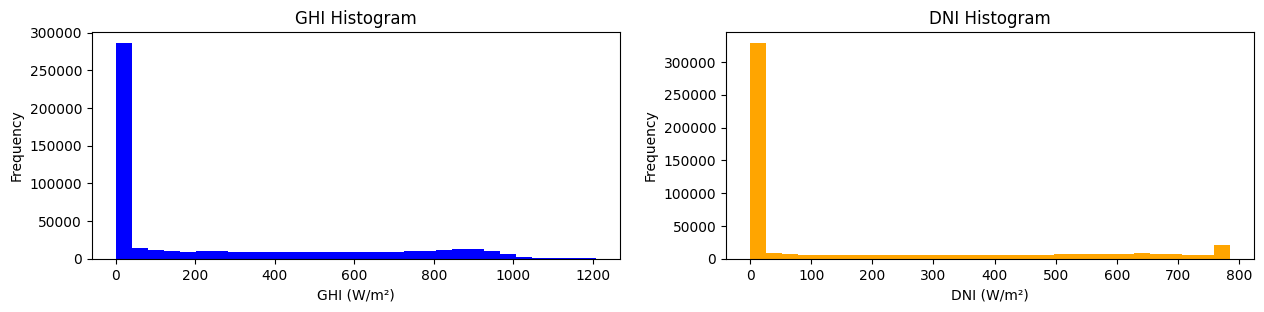

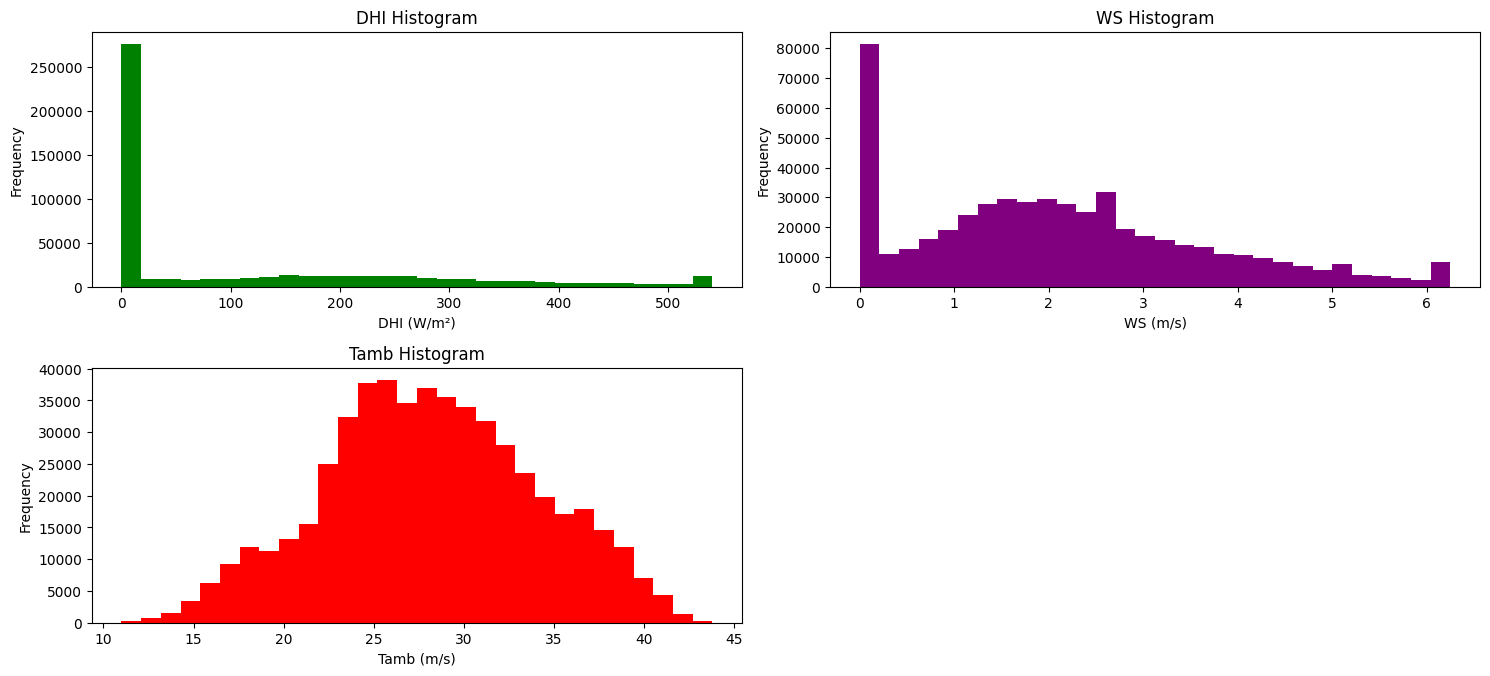

In [21]:

from scripts.solarRadiationData import freqDesForSolarRadWSandTempUsingHistogram
freqDesForSolarRadWSandTempUsingHistogram(data)